# Project 1
## Problem 2
Given are two csv files, pc1.csv and pc2.csv, which contain noisy LIDAR point cloud data in the form of (x, y, z) coordinates of the ground plane.
### Problem 2.1 
Using pc1.csv:
### Problem 2.1 (a)
Compute the covariance matrix.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KDTree
import random

In [3]:
# Load and Read Data
data = pd.read_csv("pc1.csv",header=None)
x = np.array(data[0])
y = np.array(data[1])
z = np.array(data[2])
l = len(data)


The covariance matrix is: $$ C = \begin{bmatrix} \sum{I_x^2} & \sum{I_x I_y} & \sum{I_x I_z} \\ \sum{I_x I_y} & \sum{I_y^2} & \sum{I_y I_z} \\ \sum{I_x I_z} & \sum{I_y I_z} & \sum{I_z^2} \end{bmatrix} $$

Where $I$ is the variance

In [4]:
mean_x = sum(x)/l
mean_y = sum(y)/l
mean_z = sum(z)/l

x_var = sum((x-mean_x)**2)/l
y_var = sum((y-mean_y)**2)/l
z_var = sum((z-mean_z)**2)/l
xy = sum((x-mean_x)*(y-mean_y))/l
yz = sum((y-mean_y)*(z-mean_z))/l
zx = sum((z-mean_z)*(x-mean_x))/l

C = np.array([[x_var,xy,zx],
              [xy,y_var,yz],
              [zx,yz,z_var]])
C

array([[ 33.6375584 ,  -0.82238647, -11.3563684 ],
       [ -0.82238647,  35.07487427, -23.15827057],
       [-11.3563684 , -23.15827057,  20.5588948 ]])

### Problem 2.1 (b)
Assuming that the ground plane is flat, use the covariance matrix to compute the
magnitude and direction of the surface normal.

The surface normal is the eigen vector $ [x, y, z] $ that has the smallest eigen value.

To calculate the magnitude of the of the normal we take the second norm  of the normal vector i.e.: $$ ||normal|| = \sqrt{x^2 + y^2 + z^2} $$

normal:  [0.28616428 0.53971234 0.79172003]
magnitude:  1.0


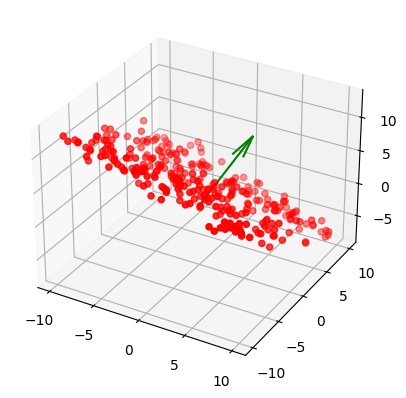

In [5]:
eigenvalues, eigenvectors = np.linalg.eig(C)
eigenvalue_idx = np.argmin(eigenvalues)
normal = eigenvectors[:,eigenvalue_idx]
magnitude = np.linalg.norm(normal,ord=2)

print("normal: ",normal)
print("magnitude: ",magnitude)

fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
ax.scatter(x,y,z,color='r')
# Length of the normal is scaled for visualization
ax.quiver(0,0,0,normal[0],normal[1],normal[2],color='g',length=10)
plt.show()


The direction of the normal for `pc1.csv` is $[0.28616428, 0.53971234, 0.79172003]$ and has a magnitude of $1.0$

### Problem 2.2
In this question, you will be required to implement various estimation algorithms such as
Standard Least Squares, Total Least Squares and RANSAC.
### Problem 2.2 (a)
Using pc1.csv and pc2, fit a surface to the data using the standard least square
method and the total least square method. Plot the results (the surface) for each
method and explain your interpretation of the results.

### Using Least Square Fitting


For ```pc1.csv``` 

coefficents:  [-0.35395482 -0.66855145  3.20255363]


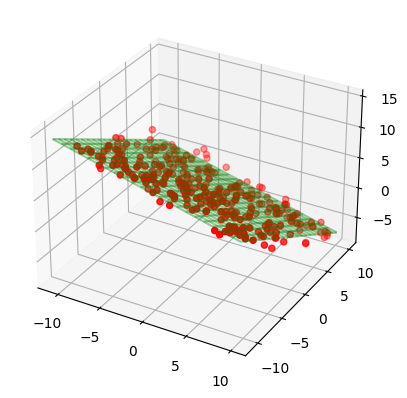

In [6]:
# For the equation of the plane aX + bY + c = Z
ones = np.ones(l)

A = np.column_stack([x,y,ones])
B = z

A_inv = np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)
coeff = np.dot(A_inv,B)
print("coefficents: ", coeff)

fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
ax.scatter(x,y,z,color='r')

xlim = ax.get_xlim()
ylim = ax.get_ylim()

X,Y = np.meshgrid(np.arange(xlim[0], xlim[1]),
                  np.arange(ylim[0], ylim[1]))
Z = np.zeros(X.shape)
for r in range(X.shape[0]):
    for c in range(X.shape[1]):
        Z[r,c] = coeff[0] * X[r,c] + coeff[1] * Y[r,c] + coeff[2]

ax.plot_wireframe(X,Y,Z, color='g', alpha=0.4)
plt.show()

For ```pc2.csv```

In [7]:
data2 = pd.read_csv("pc2.csv",header=None)
x2 = np.array(data2[0])
y2 = np.array(data2[1])
z2 = np.array(data2[2])
l2 = len(data2)

mean_x2 = sum(x2)/l2
mean_y2 = sum(y2)/l2
mean_z2 = sum(z2)/l2

x_var2 = sum((x2-mean_x2)**2)/l2
y_var2 = sum((y2-mean_y2)**2)/l2
z_var2 = sum((z2-mean_z2)**2)/l2
xy2 = sum((x2-mean_x2)*(y2-mean_y2))/l2
yz2 = sum((y2-mean_y2)*(z2-mean_z2))/l2
zx2 = sum((z2-mean_z2)*(x2-mean_x2))/l2

C2 = np.array([[x_var2,xy2,zx2],
              [xy2,y_var2,yz2],
              [zx2,yz2,z_var2]])
C2

array([[ 34.55886301,  -0.9415844 ,  -8.07232934],
       [ -0.9415844 ,  33.45779166, -22.23765617],
       [ -8.07232934, -22.23765617,  22.70066366]])

coeffiecents:  [-0.25188404 -0.67173669  3.66025669]


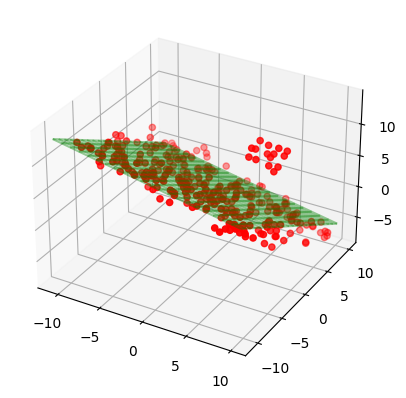

In [8]:
# For the equation of the plane aX + bY + c = Z
ones2 = np.ones(l2)

A2 = np.column_stack([x2,y2,ones2])
B2 = z2

A_inv2 = np.dot(np.linalg.inv(np.dot(A2.T,A2)),A2.T)
coeff2 = np.dot(A_inv2,B2)
print("coeffiecents: ", coeff2)

fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
ax.scatter(x2,y2,z2,color='r')

xlim = ax.get_xlim()
ylim = ax.get_ylim()

X2,Y2 = np.meshgrid(np.arange(xlim[0], xlim[1]),
                  np.arange(ylim[0], ylim[1]))
Z2 = np.zeros(X2.shape)
for r in range(X2.shape[0]):
    for c in range(X2.shape[1]):
        Z2[r,c] = coeff2[0] * X2[r,c] + coeff2[1] * Y2[r,c] + coeff2[2]

ax.plot_wireframe(X2,Y2,Z2, color='g', alpha=0.4)
plt.show()

### Using Total Least Squares Fitting


For ```pc1.csv```

0.2861642761209519 0.5397123383073391 0.7917200256094297 2.5344641945425828


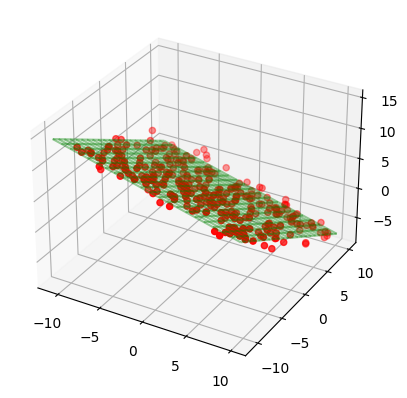

In [9]:
# aX + bY +cZ = d
# A = [x-xmean y-mean z-zmean]
# get normal -> a,b,c
# d = a*xmean + b*ymean + c*zmean

ones = np.ones(l)

# At = np.column_stack([x_var,y_var,z_var])
a,b,c = normal
norm = np.linalg.norm(normal,ord=2)

d = (a*mean_x)+(b*mean_y)+(c*mean_z)

# Zt = a*x + b*y + c*z + d

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x,y,z,color='r')

xlim = ax.get_xlim()
ylim = ax.get_ylim()

Xt,Yt = np.meshgrid(np.arange(xlim[0], xlim[1]),
                    np.arange(ylim[0], ylim[1]))

Zt = np.zeros(Xt.shape)

for r in range(Xt.shape[0]):
    for col in range(Xt.shape[1]):
        Zt[r,col] = (d/c) - (a/c) * Xt[r,col] - (b/c) * Yt[r,col] 

ax.plot_wireframe(Xt,Yt,Zt, color='g', alpha=0.4)
print(a,b,c,d)


For ```pc2.csv```

normal:  [-0.22107409 -0.5873942  -0.77852059]
magnitude:  0.9999999999999999


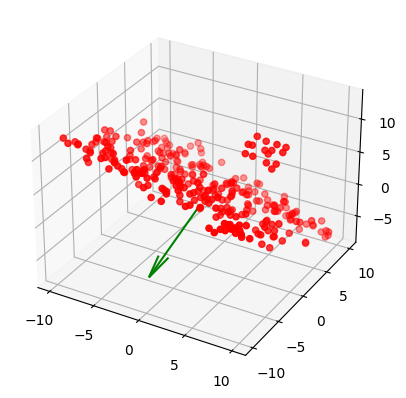

In [10]:
eigenvalues2, eigenvectors2 = np.linalg.eig(C2)
eigenvalue_idx2 = np.argmin(eigenvalues2)
normal2 = eigenvectors2[:,eigenvalue_idx2]
magnitude2 = np.linalg.norm(normal2,ord=2)

print("normal: ",normal2)
print("magnitude: ",magnitude2)

fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
ax.scatter(x2,y2,z2,color='r')
# Again length of the normal is scaled for visualization
ax.quiver(0,0,0,normal2[0],normal2[1],normal2[2],color='g',length=10)
plt.show()


-0.22107409283980348 -0.5873941957270393 -0.7785205869476044 -2.849444521836677


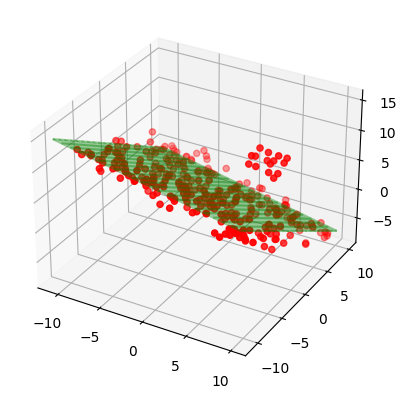

In [11]:
# aX + bY +cZ = d

a2,b2,c2 = normal2
norm2 = np.linalg.norm(normal2,ord=2)

d2 = (a2*mean_x2)+(b2*mean_y2)+(c2*mean_z2)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x2,y2,z2,color='r')

xlim = ax.get_xlim()
ylim = ax.get_ylim()

Xt2,Yt2 = np.meshgrid(np.arange(xlim[0], xlim[1]),
                    np.arange(ylim[0], ylim[1]))

Zt2 = np.zeros(Xt2.shape)

for r in range(Xt.shape[0]):
    for col in range(Xt.shape[1]):
        Zt2[r,col] = (d2/c2) - (a2/c2) * Xt2[r,col] - (b2/c2) * Yt2[r,col] 

ax.plot_wireframe(Xt2,Yt2,Zt2, color='g', alpha=0.4)
print(a2,b2,c2,d2)

### Problem 2.2 (b)
Additionally, fit a surface to the data using RANSAC. You will need to write RANSAC
code from scratch. Briefly explain all the steps of your solution, and the parameters
used. Plot the output surface on the same graph as the data. Discuss which graph
fitting method would be a better choice of outlier rejection.

For ```pc1.csv```

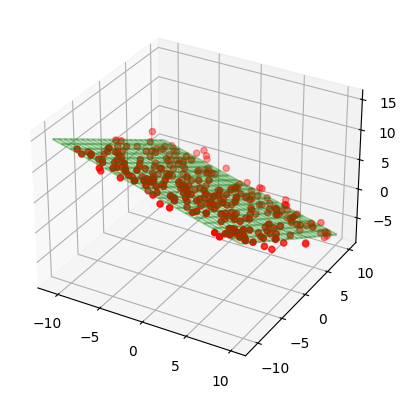

In [17]:
# tree = KDTree(np.array(data), leaf_size=2)  
# near_dist, near_idx = tree.query(data, k=8)
# thresh= np.mean(near_dist[:,1:])
# print(thresh)

def ransac(data,iterations,thresh):
    inlier= []
    for i in range(iterations):
        sample_idx = random.sample(range(len(data)), 3)
        points = np.array(data)[sample_idx]
        vector1 = points[1] - points[0]
        vector2 = points[2] - points[0]
        normal = np.cross(vector1, vector2)
        a,b,c = normal
        d = -np.sum(normal * points[1])

        dist = (a * x + b * y + c * z + d) / np.sqrt(a ** 2 + b ** 2 + c ** 2)
        
        curr_inlier = np.where(np.abs(dist) <= thresh)[0]

        if len(curr_inlier) > len(inlier):
            coeffs = [a,b,c,d]
            inlier = curr_inlier

    return coeffs

coeff = ransac(data,1000,2)

fig= plt.figure()
ax= fig.add_subplot(111,projection= '3d')
ax.scatter(x,y,z,color='r')

xlim = ax.get_xlim()
ylim = ax.get_ylim()

Xr, Yr = np.meshgrid(np.arange(xlim[0],xlim[1]),
                   np.arange(ylim[0],ylim[1]))

Zr = -(coeff[0] * Xr + coeff[1] * Yr + coeff[3]) / coeff[2]

ax.plot_wireframe(Xr, Yr, Zr, alpha=0.4, color='g') 
plt.show()

For ```pc2.csv```

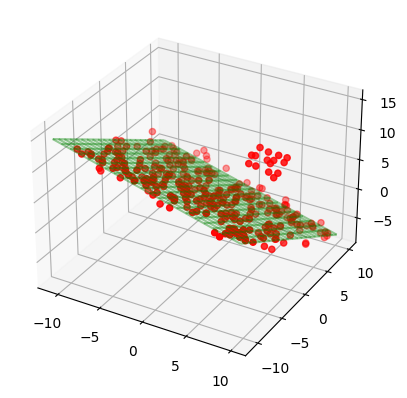

In [18]:
# tree = KDTree(np.array(data2), leaf_size=2)  
# near_dist, near_idx = tree.query(data2, k=8)
# thresh= np.mean(near_dist[:,1:])
# print(thresh)

def ransac(data2,iterations,thresh):
    inlier= []
    for i in range(iterations):
        sample_idx = random.sample(range(len(data2)), 3)
        points = np.array(data2)[sample_idx]
        vector1 = points[1] - points[0]
        vector2 = points[2] - points[0]
        normal = np.cross(vector1, vector2)
        a,b,c = normal
        d = -np.sum(normal * points[1])

        dist = (a * x2 + b * y2 + c * z2 + d) / np.sqrt(a ** 2 + b ** 2 + c ** 2)
        
        curr_inlier = np.where(np.abs(dist) <= thresh)[0]

        if len(curr_inlier) > len(inlier):
            coeffs = [a,b,c,d]
            inlier = curr_inlier

    return coeffs

coeff2 = ransac(data2,1000,2)

fig= plt.figure()
ax = fig.add_subplot(111,projection= '3d')
ax.scatter(x2,y2,z2,color='r')

xlim = ax.get_xlim()
ylim = ax.get_ylim()

X2r, Y2r = np.meshgrid(np.arange(xlim[0],xlim[1]),
                   np.arange(ylim[0],ylim[1]))

Z2r = -(coeff[0] * X2r + coeff[1] * Y2r + coeff[3]) / coeff[2]

ax.plot_wireframe(X2r, Y2r, Z2r, alpha=0.4, color='g') 
plt.show()

## Comparing OLS, TLS and RANSAC

For ```pc1.csv```

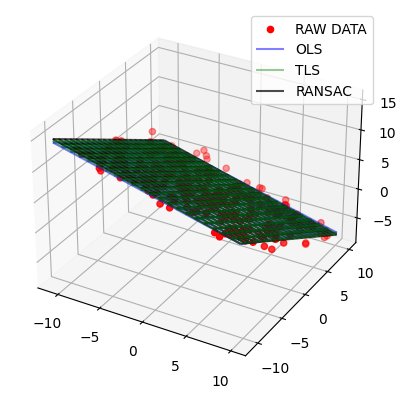

In [19]:
fig= plt.figure()
ax = fig.add_subplot(111,projection= '3d')
ax.scatter(x,y,z,color='r')

xlim = ax.get_xlim()
ylim = ax.get_ylim()

#OLS
ax.plot_wireframe(X,Y,Z, alpha=0.5, color='b')

#TLS
ax.plot_wireframe(Xt,Yt,Zt, color='g', alpha=0.4)

# RANSAC
ax.plot_wireframe(Xr, Yr, Zr, alpha=0.7, color='k') 
ax.legend(["RAW DATA","OLS","TLS","RANSAC"])
plt.show()

For ```pc2.csv```

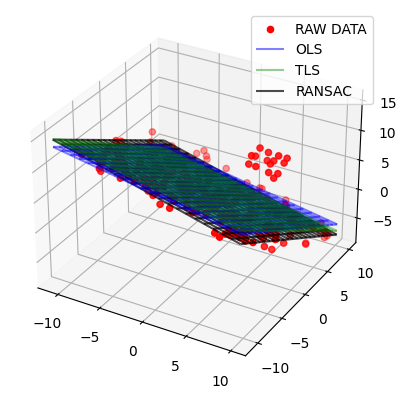

In [20]:
fig= plt.figure()
ax = fig.add_subplot(111,projection= '3d')
ax.scatter(x2,y2,z2,color='r')

#OLS
ax.plot_wireframe(X2,Y2,Z2, alpha=0.5, color='b')

#TLS
ax.plot_wireframe(Xt2,Yt2,Zt2, color='g', alpha=0.4)

# RANSAC
ax.plot_wireframe(X2r, Y2r, Z2r, alpha=0.7, color='k') 
ax.legend(["RAW DATA","OLS","TLS","RANSAC"])
plt.show()

# References:
- [Plot surface for least square fitting](https://stackoverflow.com/questions/1400213/3d-least-squares-plane#:~:text=The%20equation%20for%20a%20plane%20is%3A%20ax%20%2B%20by%20%2B%20c%20%3D%20z.%20So%20set%20up%20matrices%20like%20this%20with%20all%20your%20data%3A)